<a href="https://colab.research.google.com/github/chrfranco/06_MAIR_Aprendizaje_No_Supervisado/blob/master/Actividad_1_Notebooks_Clustering_Christian_Franco_S%C3%A1nchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACTIVIDAD 1 - NOTEBOOKS METODOS DE CLUSTERING**
# **Alumno: Christian Franco Sánchez**

# VC02 - Métodos de clustering basados en particiones

Vamos a ver algunos ejemplos de clustering con K-means.

En el primer ejemplo, vamos a intentar clusterizar un dataset de números. Este dataset consiste en 1797 imágenes (ejemplos/instancias) con 64 atributos (características/variables/*features*), donde cada una de esos 64 atributos es la intensidad de un pixel de una imagen en escala de grises de 8x8:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png">

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
digits = load_digits()
digits.data.shape

(1797, 64)

In [2]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [3]:
# utilizamos k-means para hacer el clustering
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

(10, 64)


Fijaos que el resultado del clustering son 10 centroides (1 por cada cluster que le hemos pedido). Además, como hemos utilizado los pixeles "en crudo", estos centroides tienen las mismas dimensiones que las imágenes de entrada (`10x64`) y representan al "típico" número de cada cluster. Vamos a visualizarlos:

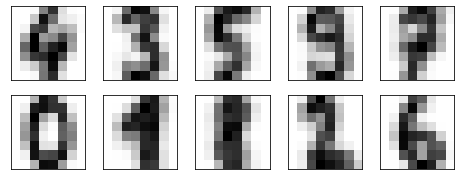

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Tal y como podemos observar, el K-means es capaz de encontrar los clusters cuyos centros son los números del 0 al 9, a excepción del 1 y el 8 que los confunde un poco.

Vamos a calcular algunas métricas intrínsecas y extrínsecas de las vistas en clase para comprobar cómo ha ido el clustering cuantitativamente.

In [5]:
from sklearn.metrics import cluster
print('Completness score =', cluster.completeness_score(digits.target, clusters))
print('Homogeneidad =', cluster.homogeneity_score(digits.target, clusters))
print('Información mutua (ajustada) =', cluster.adjusted_mutual_info_score(digits.target, clusters))

Completness score = 0.7514312243853245
Homogeneidad = 0.7423769268336259
Información mutua (ajustada) = 0.7397973157276612


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Ya que tenemos las etiquetas reales, vamos a calcular el accuracy. Para ello, vamos a usar la función `accuracy_score` disponible en  `sklearn.metrics`.

Daos cuenta de que como hemos hablado en las clases, el k-means hace agrupamientos pero no tiene ni idea de a qué *clase* pertenece cada uno. Simplemente agrupa las imágenes por similitud, de forma parecida a lo que haría un *k nearest neighbours (kNN)* o algoritmo de vecinos cercanos.

Por ello, lo primero que vamos a hacer es asignarle a cada cluster la etiqueta de acuerdo a la moda de sus elementos. Es decir, nos fijaremos en qué elemento se repite más en cada cluster, y ese será la etiqueta.

In [0]:
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Y ahora ya podemos calcular el accuracy:

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Y también la matriz de confusión:

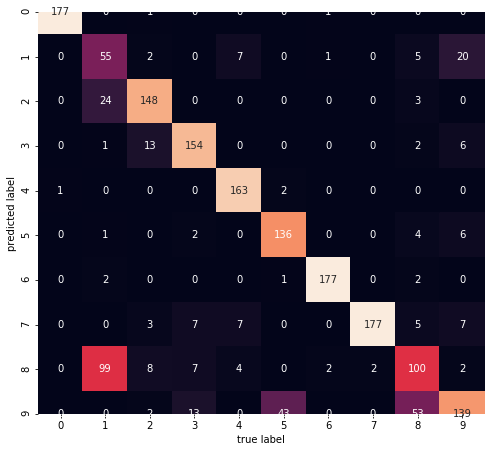

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Fijaos que hemos conseguido clasificar correctamente el 80% de nuestras imágenes con un simple K-means sin siquiera preprocesar los datos. Como hemos comprobado antes al plotear las imágenes, el algoritmo se confunde sobretodo con el 1 y el 8.

¿Y si realizásemos algún tipo de preprocesamiento que nos permitiese mejorar los resultados?

Vamos a ver qué pasaría si usásemos una técnica de reducción de dimensionalidad conocida como t-SNE (https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm):

0.9326655537006121


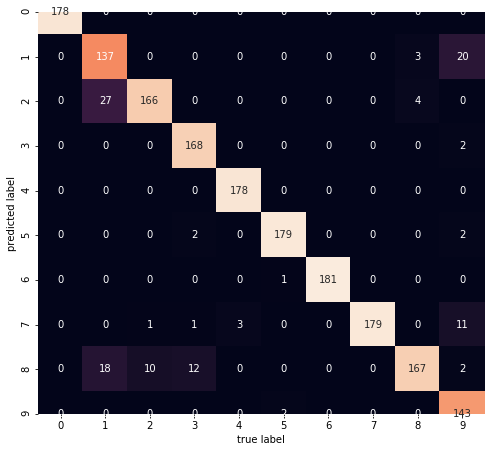

In [9]:
from sklearn.manifold import TSNE

# Utilizamos t-SNE para proyectar los datos en otro espacio de 2 dimensiones
# Este paso tarda unos segundos, no os impacientéis :)

tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Realizamos el clustering

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Asignamos las etiquetas de acuerdo a la moda
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Calculamos el accuracy
print(accuracy_score(digits.target, labels))

# Mostramos la matriz de confusión
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

¿Qué os parece? Daos cuenta de la importancia de preprocesar los datos de una forma adecuada. Con esta simple decisión hemos mejorado en un 13% la precisión de nuestro algoritmo.

¡Que no se os olvide! ;)

El segundo ejemplo que vamos a ver trata sobre compresión de imágenes. Sí, aunque parezca mentira, se pueden usar técnicas de clustering para ello.

Simplemente reducimos el número total de colores utilizados para representar la imagen, y de esta forma permitimos que se necesiten menos memoria (bits) para su almacenaje.

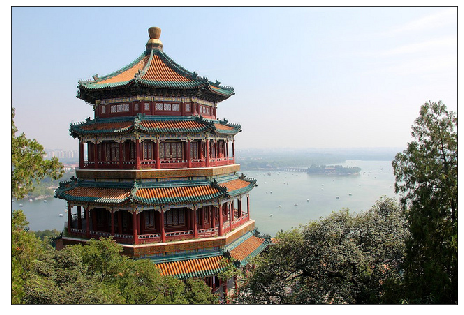

In [10]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

Recordad que las imagenes se representan como matrices de `(alto, ancho, canales)`, donde los valores de los canales son rojo/verde/azul y varían de 0 a 255.

In [11]:
china.shape

(427, 640, 3)

Sin embargo, podemos ver este dataset como una nube de puntos tridimensional, donde cada pixel es una instancia.

Vamos a normalizar los valores entre 0 y 1 y a convertirlos en `[n_instancias, 3]`.

In [12]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Ahora vamos a visualizar los pixels:

In [0]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

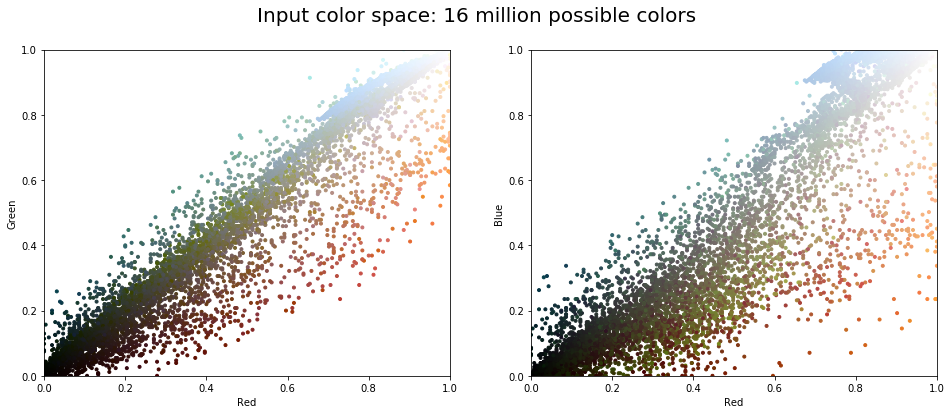

In [14]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Vamos ahora a reducir de 16 millones de colores a 16.

Como se trata de un dataset grande, vamos a usar una variación del k-means llamada mini-batch k-Means, que funciona exactamente igual que el k-means pero con mini-batches.



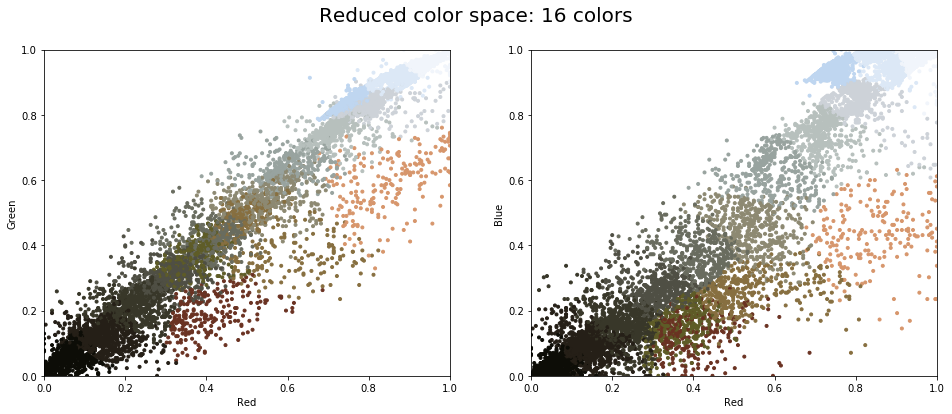

In [15]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

Perfecto. Acabamos de conseguir reducir el número de colores a 16, como podéis observar.

Vamos a transformar la imagen:

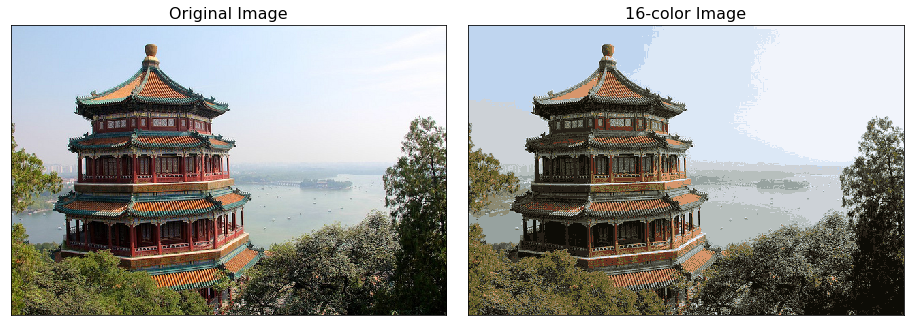

In [16]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Es indiscutible que se pierde calidad, pero pensad que acabamos de conseguir comprimir la imagen con un factor de más o menos 1 millón!

La fuente de estos ejemplos, para quien quiera consultarla: 

*   https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
*   https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
*   https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm


________________________________________________________________________________

# VC03 - Métodos de clustering jerárquico


En esta práctica vamos a ver cómo funcionan los algoritmos jerárquicos vistos en clase: el aglomerativo y el divisivo.

### Clustering jerárquico aglomerativo

En esta práctica estudiaremos el funcionamiento y la utilización del clústering jerárquico aglomerativo.

Para empezar, cargamos las librerías que vamos a necesitar:

In [0]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

### Ejemplo 1

Generamos nuestro dataset de juguete:

(150, 2)


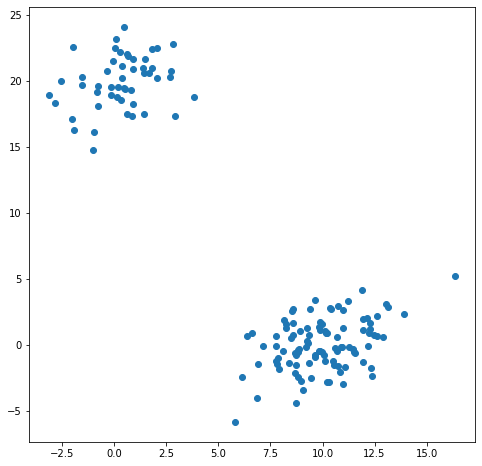

In [18]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

Ya tenemos nuestro dataset, que como podéis comprobar es bien sencillo, para poder comprender bien el funcionamiento del clustering jerárquico.

Vamos a realizar el clustering:

In [0]:
z = linkage(X, method='average', metric='euclidean')

Ya está. Fácil, ¿no os parece?

Fijaos que `scipy` nos permite elegir qué método queremos elegir entre:

-   `single`: disimilitud mínima
-   `complete`: disimilitud máxima
-   `average`: disimilitud media
-   ... y más

Y también nos permite elegir la medida de disimilitud que queremos utilizar para calcular las distancias entre clusters: `euclidean` (por defecto), `cityblock` (Manhattan), `hamming`, `cosine`, etc.

Recordad que se debe escoger la medida de disimilitud teniendo en cuenta el tipo de datos que tenemos. Por ejemplo, si tuviesemos vectores de características binarios, usaríamos la distancia `hamming`.

Vamos a medir la bondad de este clustering. Para ello, vamos a hacer uso del `Cophenetic Correlation Coefficient` (https://en.wikipedia.org/wiki/Cophenetic_correlation), disponible en la función `cophenet()` de `scipy.cluster.hierarchy`.

Esta función compara (correla) las distancias reales entre todas las muestras de nuestro dataset con aquellas que implica el clustering obtenido. Cuanto más cerca este el valor de 1, mejor preserva el clustering las distancias originales, por lo que mejor es el clusering.

In [20]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, cophs_dists = cophenet(z, pdist(X))
print(f'Cophenet coefficient: {c}')

Cophenet coefficient: 0.982091285698869


No importa qué método o métrica elijamos, la función `linkage` utilizará ese método y métrica para calcular las distancias entre los clusters (empezando por `k=n_instancias` clusters que tendrá al principio, es decir, cada muestra del dataset es un cluster) y en cada iteración mezclará los dos clusters con la distancia más pequeña de acuerdo al método y distancia elegidos.

La salida de esta función (`Z`) es un vector de longitud `k-1` que nos dará información de las operaciones realizadas en cada paso. Es decir, las `k-1` uniones que han tenido lugar durante el clustering.

`Z[i]` nos dirá qué clusters fueron unidos en la iteración `i`:

In [21]:
z[0]

array([52.     , 53.     ,  0.04151,  2.     ])

La salida es la siguiente:

`[idx1, idx2, distancia, número de muestras]`

En este caso podéis ver cómo el algoritmo ha decidido unir los clusters 52 y 53, que tenían una distancia de 0.04151, y esta operación dió como resultado un cluster con 2 instancias. `idx1` e `idx2` se corresponden con los índices de nuestras muestras. Recordad que nuestro dataset tiene 150 muestras.

Vamos a ver las 20 primeras operaciones:

In [22]:
z[:20]

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.15356,   3.     ],
       [ 41.     , 158.     ,   0.1618 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 22.     , 150.     ,   0.2045 ,   3.     ],
       [ 39.     ,  88.     ,   0.20628,   2. 

Fijaos en lós índices, ¿véis algo raro? Fijaos también en la columna de número de muestras. ¿Qué esta pasando?

Lo que esta pasando es que cada vez que ocurre una unión, se crea un nuevo cluster con un nuevo índice (por eso hay más de 150, que es el número de muestras de nuestro dataset == el número de clusters iniciales).

De hecho, todos los clusters cuyo índice es mayor que 149 (`idx >= len(X)`), realmente se refieren al cluster formado en la unión `Z[idx - len(X)`.

Así, el `idx` 149 se corresponde con `X[149]`, pero el `idx=150` se corresponde con el cluster formado en el paso `Z[0]`, y así sucesivamente.

Si os fijáis en la iteración 13, se mezclan el cluster 62 con el 152. ¿Y qué es lo que hay en el cluster 152? Pues `Z[152-150]=Z[2]`, por lo tanto, lo que se unió en la iteración 3 (`Z` está indexado en 0). Es decir, el cluster 33 y 68.

Vamos a ver las coordenadas para ver si tiene sentido:

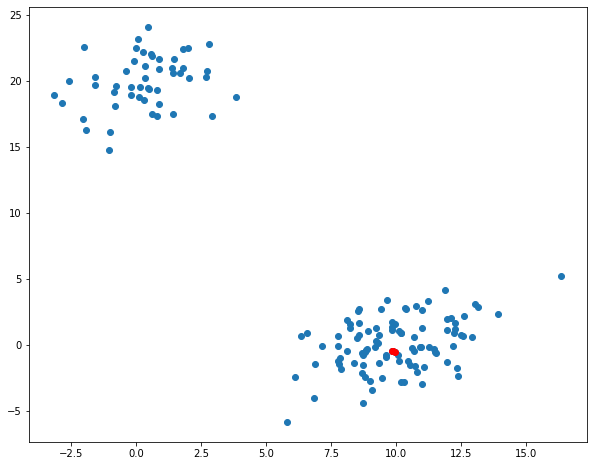

[[ 9.83913 -0.4873 ]
 [ 9.89349 -0.44152]
 [ 9.97793 -0.56383]]


In [23]:
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()

print(X[idxs])

Fijaos que los puntos realmente están bastante cerca los unos de los otros, así que tiene sentido.

Vamos ahora a ver el dendograma:

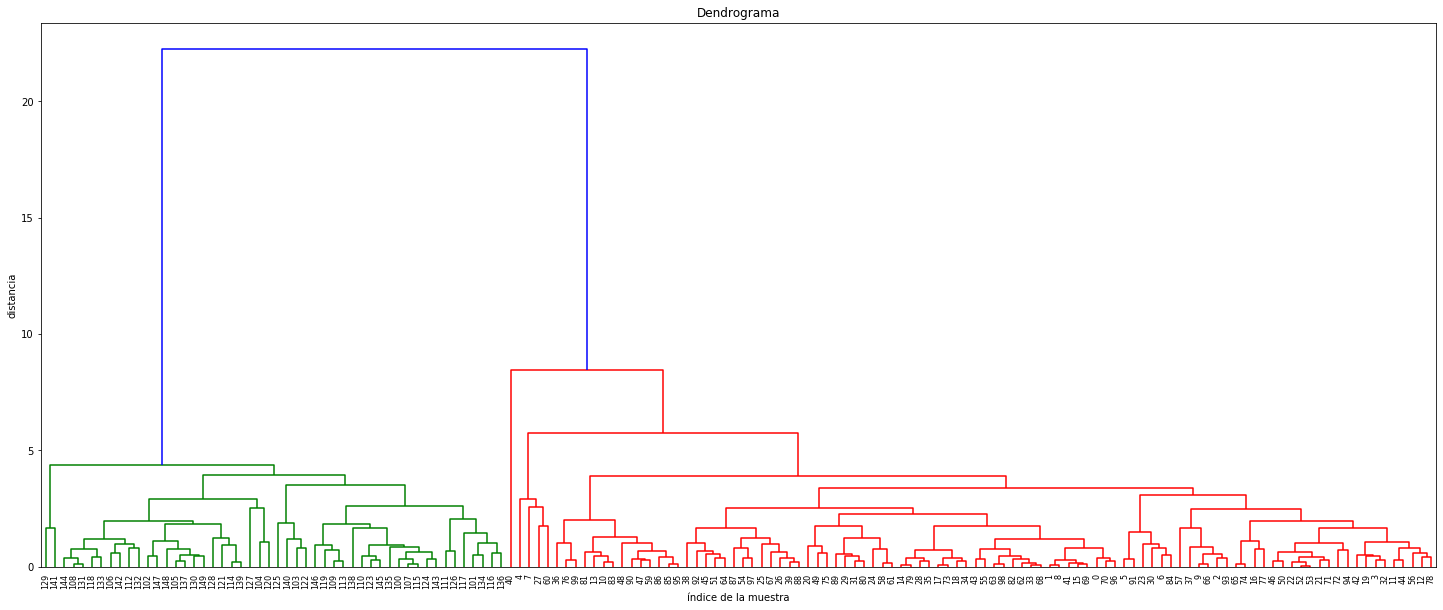

In [24]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Resumiendo el dendograma:

 -   Las lineas horizontales son uniones de clusters
 -   Las líneas verticales nos indican que clústers son parte de cada unión
 -   Las alturas de las líneas verticales nos indican la distancia que se "cubrió" al hacer la unión

 Además, el dendograma nos permite hacer cosas bastante útiles:

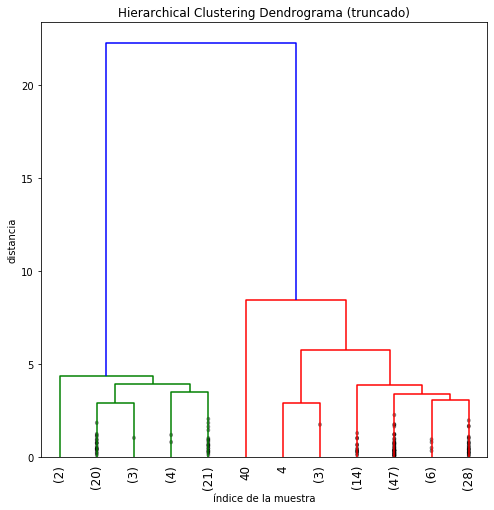

In [25]:
# quedarnos con las últimas p uniones
plt.title('Hierarchical Clustering Dendrograma (truncado)')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    z,
    truncate_mode='lastp',  # mostrar solo las últimas p uniones
    p=12,  # definimos p
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [0]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

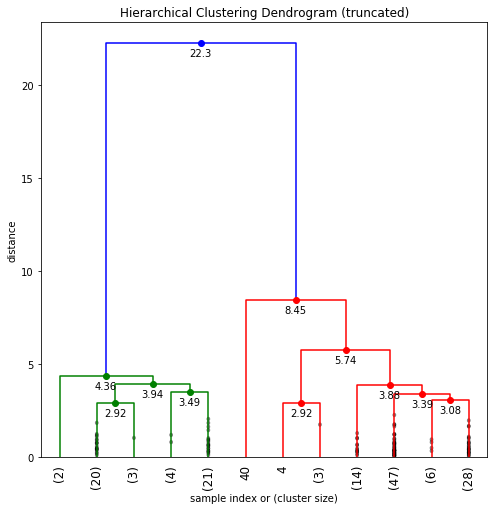

In [27]:
fancy_dendrogram(
    z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,  # useful in small plots so annotations don't overlap
)
plt.show()

Vamos ahora a seleccionar en qué punto del proceso nos quedamos:

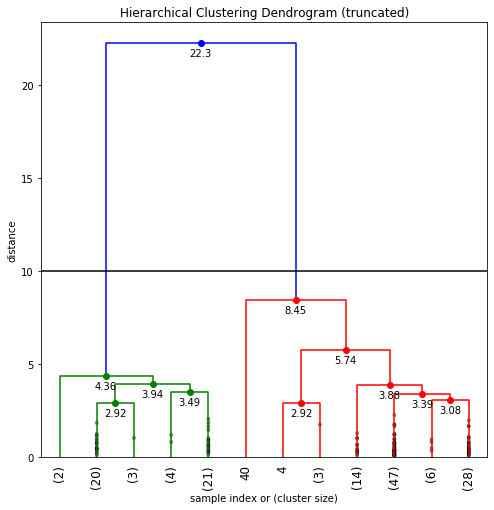

In [28]:
d_max = 10


fancy_dendrogram(
    z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,
    max_d=d_max,  # plot a horizontal cut-off line
)
plt.show()

Fuente: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

### Ejemplo 2

Vamos a ver un segundo ejemplo, esta vez real.

Imaginaos que pertenecéis a la junta directiva de un centro comercial y queréis hacer un estudio de qué perfil de cliente es el más rentable para vosotros.

Para ello, vamos a hacer uso de este dataset: https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv.

In [29]:
!rm hier*

rm: cannot remove 'hier*': No such file or directory


In [30]:
!wget https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv
!ls -la

--2019-11-30 16:22:19--  https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv
Resolving stackabuse.s3.amazonaws.com (stackabuse.s3.amazonaws.com)... 52.216.94.203
Connecting to stackabuse.s3.amazonaws.com (stackabuse.s3.amazonaws.com)|52.216.94.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4286 (4.2K) [text/csv]
Saving to: ‘hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv’

hierarchical-cluste 100%[===================>]   4.19K  --.-KB/s    in 0s      

2019-11-30 16:22:20 (79.8 MB/s) - ‘hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv’ saved [4286/4286]

total 24
drwxr-xr-x 1 root root 4096 Nov 30 16:22 .
drwxr-xr-x 1 root root 4096 Nov 30 16:07 ..
drwxr-xr-x 1 root root 4096 Nov 21 16:30 .config
-rw-r--r-- 1 root root 4286 Jun 24 21:58 hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv
drwxr-xr-x 1 root root 4096 Nov 21 16:30 samp

In [31]:
import pandas as pd
customer_data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Para poder visualizarlo, vamos a quedarnos con las 2 columnas, y vamos a realizar un clustering con ellas para ver qué tipos diferentes de clientes tenemos:

In [32]:
data = customer_data.iloc[:, 3:].values
print(data[:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


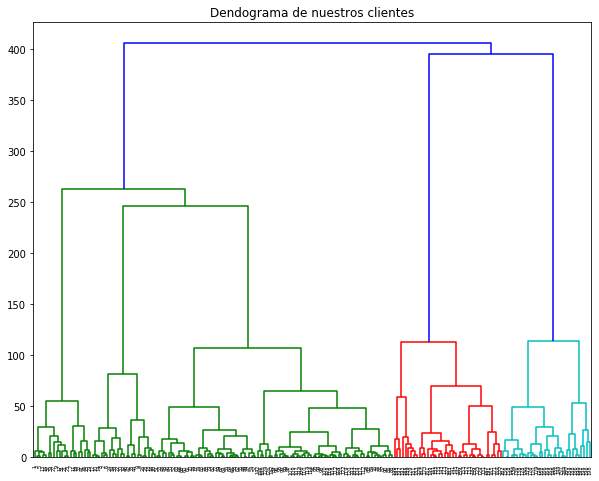

In [33]:
# realizamos el clustering

plt.figure(figsize=(10, 8))
plt.title("Dendograma de nuestros clientes")
z = linkage(data, method='ward')
dendrograma = dendrogram(z)

Fijaos que parece que encuentra 5 tipos de clientes más o menos diferenciados (cortando en 150, donde existe la mayor distancia vertical para el cluster de más a la derecha). Pero lo único que tenemos en Z es la clasificación de los clientes existentes. ¿Y si quisieramos predecir un nuevo cliente?

Necesitamos hacer uso de `AgglomerativeClustering`:

In [34]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(data)
print(clusters)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


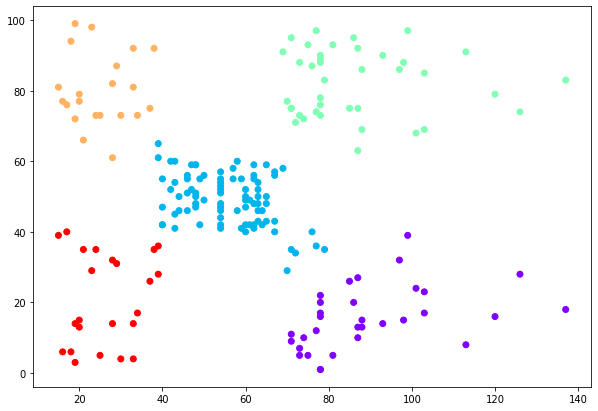

In [35]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')